In [100]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 분류 결과 평가를 위한 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings('ignore')

## 02. 데이터 가져오기
### 학습 데이터 가져오기


In [101]:
origin = read_excel('https://data.hossam.kr/G02/iris.xlsx')
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 전처리
#### 종속변수의 종류 확인

In [102]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [103]:
labels = {'setosa': 0, 'versicolor': 1, 'virginica': 2 }
labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [104]:
classes = {0: 'setosa', 1:'veriscolor', 2:'virginica'}
classes

{0: 'setosa', 1: 'veriscolor', 2: 'virginica'}

In [105]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)

#### Classify Features and Label
##### Feature

In [106]:
x = df.drop('Species', axis =1 )
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Label

In [107]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 시각화를 통한 데이터 확인

#### case 1: feature 2개만 사용

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

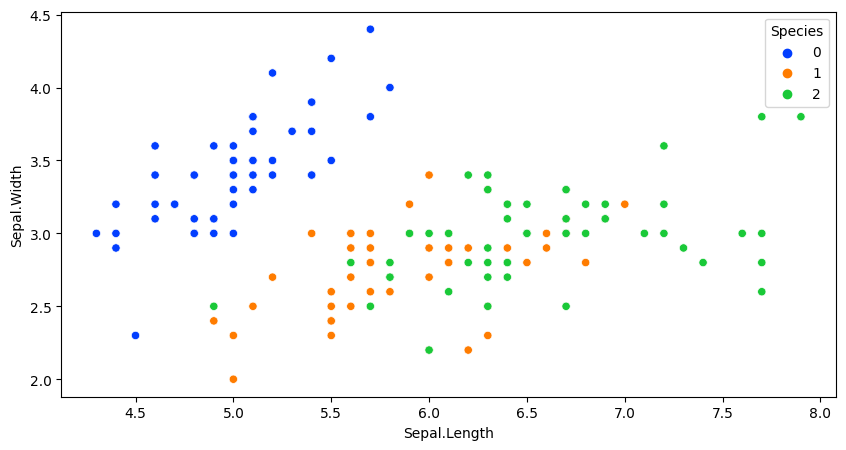

In [108]:
plt.figure( figsize = (10,5))

sb.scatterplot(data=df, x = "Sepal.Length", y = 'Sepal.Width',hue = 'Species', palette='bright')

#### case 2: 산점도 행렬

<Figure size 1000x500 with 0 Axes>

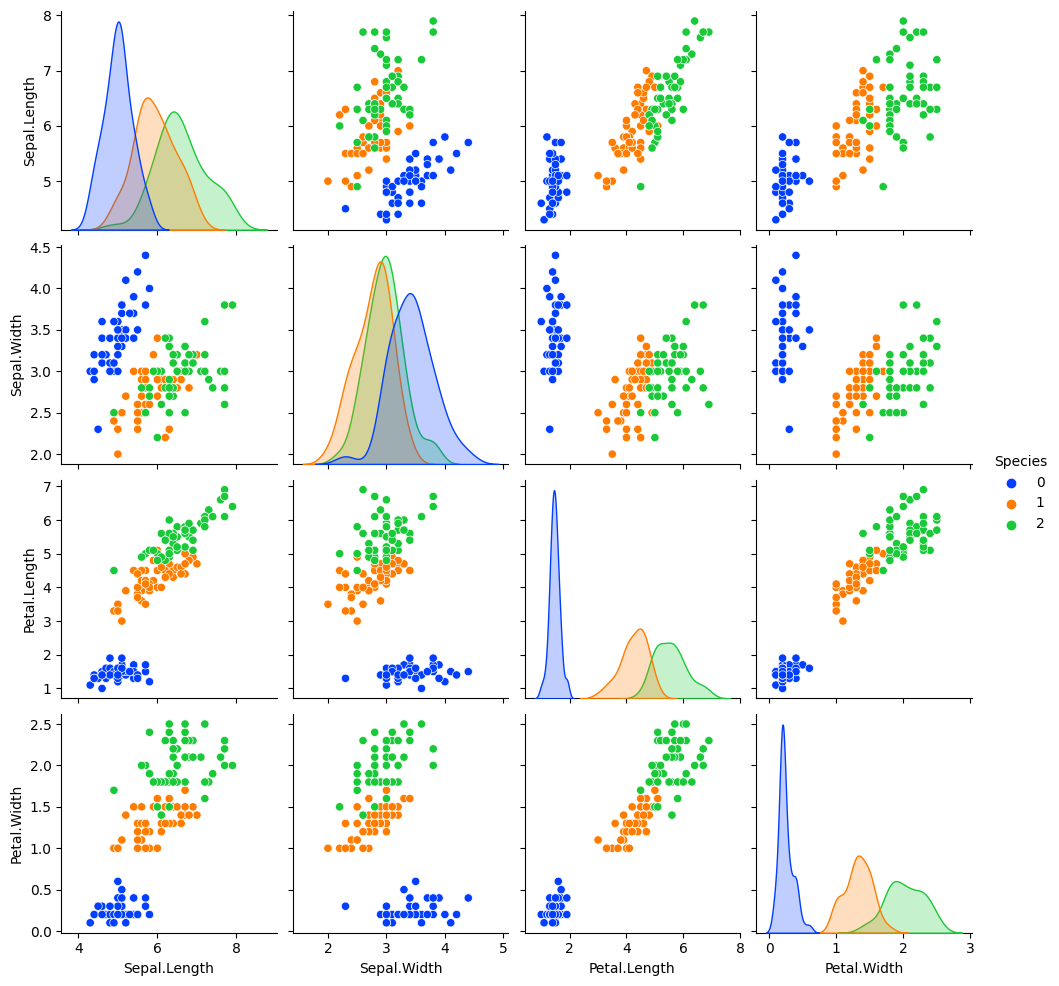

In [109]:
plt.figure(figsize= (10,5))
sb.pairplot(data=df, hue = 'Species', palette = 'bright')
plt.show()
plt.close()

#### seaborn

1) scatter Plot: hue 사용 가능, 그래프에서 자체적으로 추세선을 지원하지 않는다.

2) regplot: 추세선은 지원 but not hue

3) pairplot

## 03. K-NN 분류모델 구성

In [110]:
k = 3 # default k = 5
knn = KNeighborsClassifier(n_neighbors=k)  
# 학습
knn.fit(x, y)
# 예측치 생성
y_pred = knn.predict(x)
# 측정값과 예측치를 데이터프레임으로 생성
y_pred_df = DataFrame({"y" : y.values, "y_pred" : y_pred})
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


## 04. 분류 과정 확인

#### 분류 대상 예시 생성

In [111]:
new_data = [[5.2, 3.5, 1.5,0.2]]

#### 새로운 분류 대상에 대한 예측

In [112]:
new_data_pred = knn.predict(new_data)
print("데이터: {0}, 예측: {1}".format(new_data_pred[0], classes[new_data_pred[0]]))

데이터: 0, 예측: setosa


#### 근접한 이웃의 거리와 인덱스

In [113]:
dist, index = knn.kneighbors(new_data)
print('거리: {0}, 인덱스: {1}'.format(dist, index))

거리: [[0.         0.14142136 0.14142136]], 인덱스: [[27 28  0]]


#### 근접한 이웃에 대한 실 데이터
##### 근접한 이웃 데이터를 numpy array로 추출
> 이전 실습 내용과 동일

In [114]:
df.values[index]

array([[[5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [5.1, 3.5, 1.4, 0.2, 0. ]]])

##### 근접한 이웃 데이터를 dataframe으로 추출

In [115]:
neighbors_data = df.iloc[index[0]]
neighbors_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


#### 분류 결과 시각화

In [116]:
# print(new_data[0][0], type(new_data[0][0]))

In [117]:
# print([new_data[0][0]],type([new_data[0][0]]))

<Axes: title={'center': 'Petal.Length vs Petal.Width'}, xlabel='Petal Length', ylabel='Petal Width'>

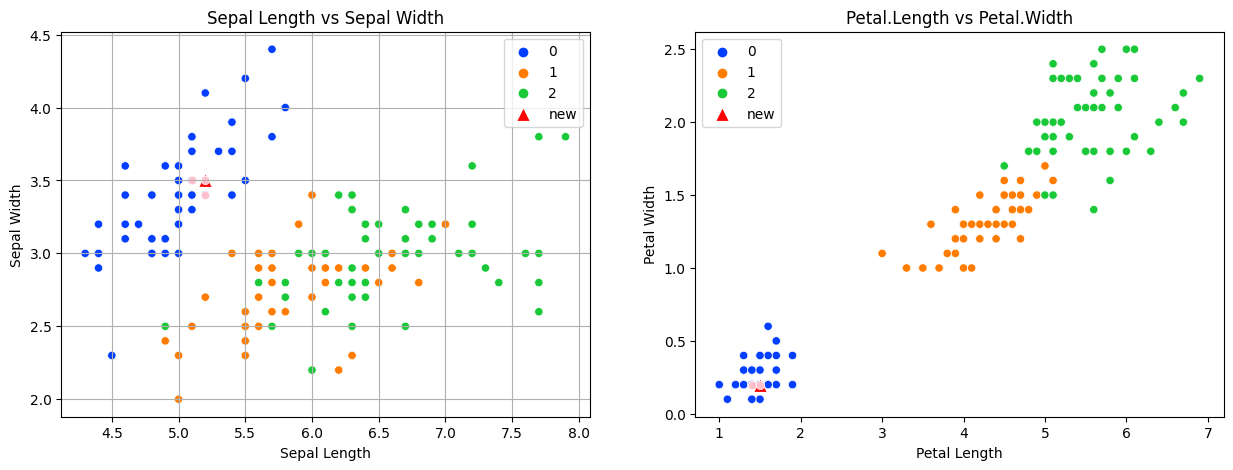

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

# Sepal .Length vs Sepal.Width
sb.scatterplot(data=df, x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species',
               palette = 'bright', ax = ax1)
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_title('Sepal Length vs Sepal Width')
ax1.grid()

# 새로운 데이터 투입
sb.scatterplot(data=new_data, x= [new_data[0][0]], y = [new_data[0][1]], s= 100, c = 'r', marker = "^",  label= 'new',ax =  ax1)
# 근접 이웃 표시
sb.scatterplot(data= neighbors_data,  x = 'Sepal.Length', y = 'Sepal.Width', c = 'pink', ax=ax1)

# Petal.Length vs Petal.Width
sb.scatterplot(data=df, x= "Petal.Length", y = "Petal.Width", hue = "Species",
               palette = 'bright', ax = ax2)
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.set_title('Petal.Length vs Petal.Width')

# 새로운 데이터 투입
sb.scatterplot(data=new_data, x= [new_data[0][2]], y = [new_data[0][3]], s= 100, c = 'r', marker = "^",  label = 'new',ax =  ax2 )
# 근접 이웃 표시
sb.scatterplot(data= neighbors_data,  x = 'Petal.Length', y = 'Petal.Width', c = 'pink', ax=ax2)


## 05. 분류 성능 확인

사이킷런 패키지는 `metrics` 모듈에 다양한 성능 평가 방법을 제공한다.

이 때 주의할 점은 이진 분류 여부를 잘 확인하여 각각의 평가 지표를 적절하게 적용해야 한다.

- 오차행렬(혼돈행렬): `confusion_matrix(관측치, 예측치)`
- 정확도: `accuracy_score(관측치, 예측치)`
- 정밀도: `precision_score(관측치, 예측치)`
- 재현율: `recall_score(관측치, 예측치)`
- F1 스코어: `f1_score(관측치, 예측치)`
- ROC 곡선: `roc_curve(관측치, 예측치)`
- 분류 리포트: `classification_report(관측치, 예측치)`
- AUC: `roc_auc_score(관측치, 예측치)`

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다. 이런 경우 <정밀도 혹은 재현율>

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 105, 검증용 데이터셋 크기: 45


훈련 데이터를 이용하여 예측값 산출

In [120]:
knn = KNeighborsClassifier(n_neighbors=k)  
# 학습
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

compare_df = DataFrame({"y" : y_test.values, "y_pred" : y_pred})
compare_df



,y,y_pred
0,2,2
1,0,0
2,2,2
3,2,2
4,1,1
5,0,0
6,2,2
7,2,2
8,0,0
9,0,0


#### 정확도 확인

In [121]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777
